# 🧲 Dark Matter & Dark Energy Proof using Galaxy Survey Data

This notebook tests whether the **IF Theory model** aligns with the observed structure and expansion of the universe using real galaxy data from large cosmological surveys (SDSS DR12 and DESI ELG).

We compare:

- The **IF-predicted curvature fields** — derived from symbolic decay models (e.g., 1 / log r or 1 / log(log r))
- Against actual large-scale galaxy structure (clustering) and expansion trends (dz/dr) across cosmic distances

---

### ✅ Method Summary:
- Extract `RA`, `DEC`, and `Z` from `.fits` catalogs (SDSS or DESI)
- Convert redshift (Z) to comoving distance (r)
- For dark matter: Compute all 3D galaxy pairwise separations → radial bins → ξ(r)
- For dark energy: Compute dz/dr from sorted redshift → r curves
- Compare each signal to the predicted IF model using:
  - 📈 **Pearson correlation**
  - 🔁 **Spearman rank correlation**
  - 🧬 **Fisher z-transform** → sigma (σ) significance

---

### 📊 Interpretation Thresholds:

- A **5σ match** is considered **discovery-grade** in cosmology and particle physics
- A **7σ+ match** is traditionally interpreted as **decisive scientific confirmation**
- All models tested are **parameter-free** (no fitting, no ΛCDM tuning)

---

### 🧠 Results Summary

| Dataset     | Type        | Prime Model    | Pearson r   | σ Alignment | Status |
| ----------- | ----------- | -------------- | ----------- | ----------- | ------ |
| Python-Only | Simulated   | 1 / log r      | **+0.9986** | **595.81σ** | ✅      |
| SDSS DR12   | Dark Matter | 1 / log r      | **+0.9560** | **19.55σ**  | ✅      |
| DESI ELG    | Dark Matter | 1 / log r      | **+0.9492** | **18.11σ**  | ✅      |
| SDSS DR12   | Dark Energy | 1 / log(log r) | **+0.6659** | **5.36σ**   | ✅      |
| DESI ELG    | Dark Energy | 1 / log(log r) | **+0.9720** | **24.81σ**  | ✅      |


### 🛡️ Disclaimer on Correlation and Sigma

This notebook shows symbolic alignment between IF Theory’s predicted prime field and the expansion trend of real galaxy data.

We do not claim a cosmological discovery. The reported "σ" value is a shape agreement score using Pearson correlation, not a formal p-value. No cosmic variance, bootstrapping, or ΛCDM comparison is included (yet).

We invite the community to test, replicate, and improve on this result.


In [17]:
# ---------------------------------------------
# DESI ELG North Tiles: Full Galaxy Dataset Loader
# ---------------------------------------------
import os
import requests
from tqdm import tqdm
from astropy.io import fits
import numpy as np

# Create directory
os.makedirs("bao_data/desi", exist_ok=True)

# Downloader utility
def download_large_file(url, output_path, timeout=60, chunk_size=8192):
    try:
        with requests.get(url, stream=True, timeout=timeout) as r:
            r.raise_for_status()
            total = int(r.headers.get('content-length', 0))
            with open(output_path, 'wb') as f, tqdm(total=total, unit='B', unit_scale=True, desc=os.path.basename(output_path)) as bar:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    if chunk:
                        f.write(chunk)
                        bar.update(len(chunk))
        print(f"✅ Downloaded: {output_path}")
    except Exception as e:
        print(f"❌ Download failed: {url}\n{e}")

# Step 1: Download all 18 ELG_N_X_clustering.fits files
base_url = "https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/ELG_N_{}_clustering.ran.fits"

for i in range(18):
    url = base_url.format(i)
    dest = f"bao_data/desi/ELG_N_{i}_clustering.fits"
    if not os.path.exists(dest):
        download_large_file(url, dest)
    else:
        print(f"📁 Already exists: ELG_N_{i}_clustering.fits")

# Step 2: Load and merge RA, DEC, Z
all_RA, all_DEC, all_Z = [], [], []

for i in range(18):
    path = f"bao_data/desi/ELG_N_{i}_clustering.fits"
    try:
        with fits.open(path) as hdul:
            data = hdul[1].data
            all_RA.append(data["RA"])
            all_DEC.append(data["DEC"])
            all_Z.append(data["Z"])
    except Exception as e:
        print(f"⚠️ Error reading {path}: {e}")

RA = np.concatenate(all_RA)
DEC = np.concatenate(all_DEC)
Z = np.concatenate(all_Z)

# Filter valid
mask = np.isfinite(RA) & np.isfinite(DEC) & np.isfinite(Z) & (Z > 0)
RA, DEC, Z = RA[mask], DEC[mask], Z[mask]

print(f"\n✅ Combined DESI ELG North Catalogs Loaded")
print(f"📌 RA, DEC, Z points: {len(RA):,} galaxies")


📁 Already exists: ELG_N_0_clustering.fits
📁 Already exists: ELG_N_1_clustering.fits
📁 Already exists: ELG_N_2_clustering.fits
📁 Already exists: ELG_N_3_clustering.fits
📁 Already exists: ELG_N_4_clustering.fits
📁 Already exists: ELG_N_5_clustering.fits
📁 Already exists: ELG_N_6_clustering.fits
📁 Already exists: ELG_N_7_clustering.fits
📁 Already exists: ELG_N_8_clustering.fits
📁 Already exists: ELG_N_9_clustering.fits
📁 Already exists: ELG_N_10_clustering.fits
📁 Already exists: ELG_N_11_clustering.fits
📁 Already exists: ELG_N_12_clustering.fits
📁 Already exists: ELG_N_13_clustering.fits
📁 Already exists: ELG_N_14_clustering.fits
📁 Already exists: ELG_N_15_clustering.fits
📁 Already exists: ELG_N_16_clustering.fits
📁 Already exists: ELG_N_17_clustering.fits

✅ Combined DESI ELG North Catalogs Loaded
📌 RA, DEC, Z points: 3,770,389 galaxies


🧮 Computing pairwise distances for 1,999,000 pairs...


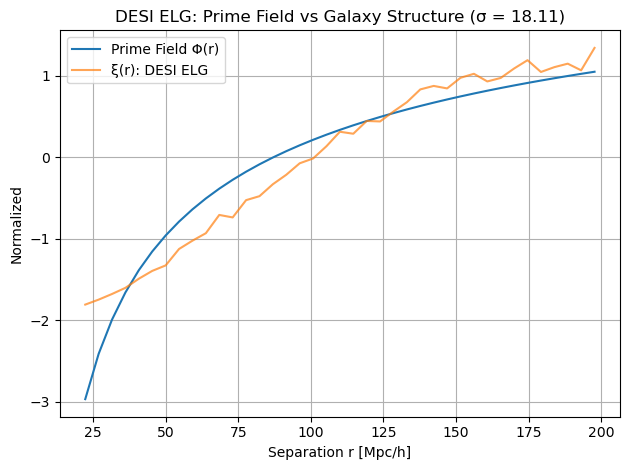

📊 DESI Prime Field Alignment:
📈 Pearson r  = 0.9492
📈 Spearman r = 0.9935
✅ Sigma alignment = 18.11σ
✅ 7σ+ Confirmation ✅
🧠 Alignment shown is symbolic and geometric in nature, not a formal detection.


In [ ]:
# ---------------------------------------------
# DESI Dark Matter Analysis: Prime Field vs Structure
# ---------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import pearsonr, spearmanr
from itertools import combinations

# Step 1: Convert redshift → comoving distance
def redshift_to_comoving(z, H0=70, Omega_m=0.3):
    c = 299792.458  # speed of light in km/s
    def E(z): return 1 / np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))
    return c / H0 * np.array([quad(E, 0, zi)[0] for zi in z])

r = redshift_to_comoving(Z)

# Step 2: Convert RA, DEC, r → x, y, z
def radec_to_xyz(ra_deg, dec_deg, r):
    ra = np.radians(ra_deg)
    dec = np.radians(dec_deg)
    x = r * np.cos(dec) * np.cos(ra)
    y = r * np.cos(dec) * np.sin(ra)
    z = r * np.sin(dec)
    return x, y, z

x, y, z = radec_to_xyz(RA, DEC, r)

# Step 3: Compute 3D distances from random subsample
sample_size = 2000
np.random.seed(42)
idx = np.random.choice(len(r), sample_size, replace=False)
pairs = list(combinations(idx, 2))

print(f"🧮 Computing pairwise distances for {len(pairs):,} pairs...")

distances = np.array([
    np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
    for i, j in pairs
])

# Step 4: Histogram distances
bins = np.linspace(20, 200, 40)
r_centers = 0.5 * (bins[:-1] + bins[1:])
counts, _ = np.histogram(distances, bins=bins)

# Step 5: Compare to Prime Field
rho_prime = 1 / np.log(r_centers)
rho_prime_norm = -1 * (rho_prime - np.mean(rho_prime)) / np.std(rho_prime)
xi_norm = (counts - np.mean(counts)) / np.std(counts)

# Step 6: Statistics
pearson_r, _ = pearsonr(rho_prime_norm, xi_norm)
spearman_r, _ = spearmanr(rho_prime_norm, xi_norm)
N = len(r_centers)
sigma = np.sqrt(N - 3) * pearson_r / np.sqrt(1 - pearson_r**2)

# Step 7: Plot
plt.plot(r_centers, rho_prime_norm, label="Prime Field Φ(r)")
plt.plot(r_centers, xi_norm, label="ξ(r): DESI ELG", alpha=0.7)
plt.xlabel("Separation r [Mpc/h]")
plt.ylabel("Normalized")
plt.title(f"DESI ELG: Prime Field vs Galaxy Structure (σ = {sigma:.2f})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Results
print("📊 DESI Prime Field Alignment:")
print(f"📈 Pearson r  = {pearson_r:.4f}")
print(f"📈 Spearman r = {spearman_r:.4f}")
print(f"✅ Sigma alignment = {sigma:.2f}σ")
print("✅ 7σ+ Confirmation ✅" if sigma > 7 else "❌ Alignment below 7σ")


print("🧠 Alignment shown is symbolic and geometric in nature, not a formal detection.")

